In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
import pickle

In [6]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)  
  
  
print(train_data.keys())

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [0]:
X_train,y_train = train_data['features'],train_data['labels']
X_test,y_test = test_data['features'],test_data['labels']
X_val,y_val = val_data['features'],val_data['labels']


In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]),'The number of images if not equal to labels'
assert(X_val.shape[0] == y_val.shape[0]),'The number of images if not equal to labels'
assert(X_test.shape[0] == y_test.shape[0]),'The number of images if not equal to labels'

assert(X_train.shape[1:] == (32,32,3)),'The dimension of the images are not 32x32x3'
assert(X_val.shape[1:] == (32,32,3)),'The dimension of the images are not 32x32x3'
assert(X_test.shape[1:] == (32,32,3)),'The dimension of the images are not 32x32x3'

In [0]:
import pandas as pd
import random

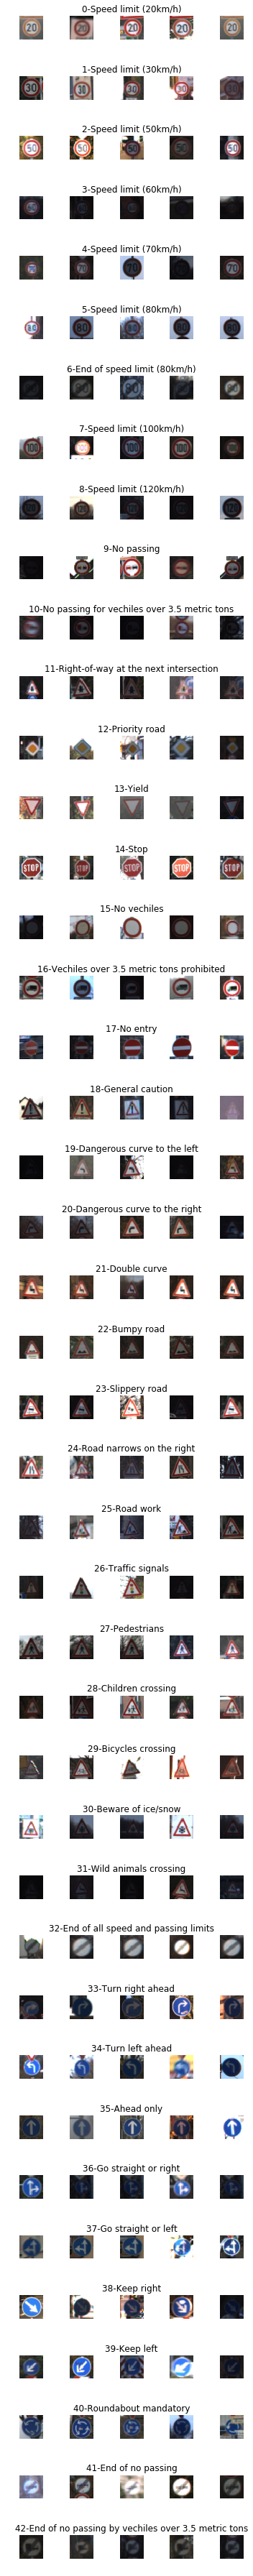

In [11]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []
cols,num_classes = 5,43

fig,axs = plt.subplots(nrows=num_classes,ncols = cols,figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j,row in data.iterrows():
    x_selected = X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:], cmap = plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i==2:
      axs[j][i].set_title(str(j)+'-'+row['SignName'])
      num_of_samples.append(len(x_selected))
      



[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


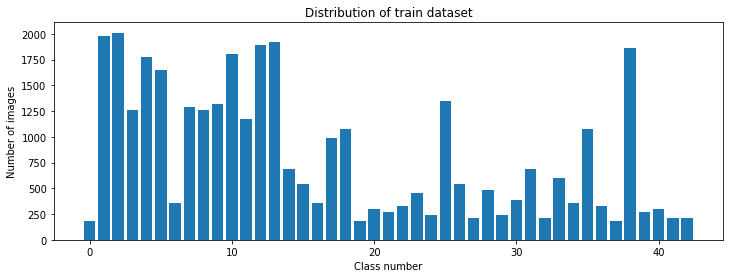

In [12]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title('Distribution of train dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

(32, 32, 3)
36


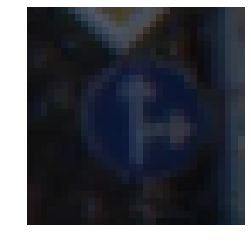

In [13]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


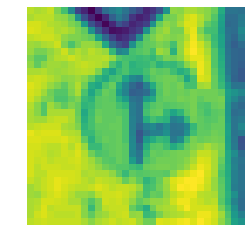

In [14]:
def grayscale(img):
  
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.bitwise_not(img) # boosted accuracy from 87% to 91% on test data.
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')


print(img.shape)

(32, 32)


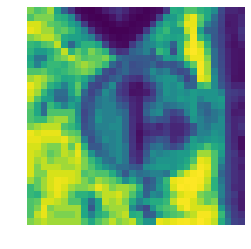

In [15]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing,X_train)))
X_val = np.array(list(map(preprocessing,X_val)))
X_test = np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


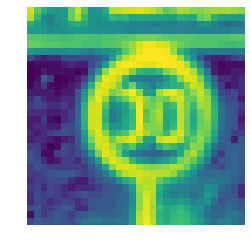

In [17]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)


In [0]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(X_train)

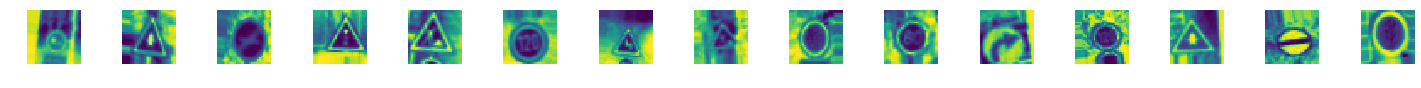

In [20]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch,y_batch = next(batches)

fig,axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [0]:
# def leNet_model():
#   model = Sequential()
#   model.add(Conv2D(60,(5,5),input_shape=(32,32,1), activation = 'relu'))
#   model.add(MaxPooling2D(pool_size = (2,2)))
#   model.add(Conv2D(30,(3,3),activation = 'relu'))
#   model.add(MaxPooling2D(pool_size = (2,2)))
  
#   model.add(Flatten())
  
#   model.add(Dense(500,activation = 'relu'))
#   model.add(Dropout(0.5))
#   model.add(Dense(43,activation = 'softmax'))
  
#   model.compile(Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
#   return model
def leNet_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1), activation = 'relu'))
  model.add(Conv2D(60,(5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
#   model.add(Dropout(0.5)) commented out to reduce the gap between test data and validation data after data augmentation
  
  model.add(Flatten())
  
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43,activation = 'softmax'))
  
  model.compile(Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [23]:
model = leNet_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [25]:
# h = model.fit_generator(X_train, y_train, epochs = 10, validation_data=(X_val,y_val),batch_size = 400, verbose = 1, shuffle = 1)
h = model.fit_generator(datagen.flow(X_train,y_train, batch_size = 50),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val),shuffle=1,verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2000/2000 [==============================] - 55s 28ms/step - loss: 1.0484 - acc: 0.6862 - val_loss: 0.0917 - val_acc: 0.9701
Epoch 2/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.2849 - acc: 0.9113 - val_loss: 0.0320 - val_acc: 0.9912
Epoch 3/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1926 - acc: 0.9412 - val_loss: 0.0393 - val_acc: 0.9868
Epoch 4/10
2000/2000 [==============================] - 53s 27ms/step - loss: 0.1517 - acc: 0.9546 - val_loss: 0.0358 - val_acc: 0.9889
Epoch 5/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1309 - acc: 0.9601 - val_loss: 0.0314 - val_acc: 0.9916
Epoch 6/10
2000/2000 [==============================] - 53s 27ms/step - loss: 0.1162 - acc: 0.9650 - val_loss: 0.0230 - val_acc: 0.9932
Epoch 7/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.1046 - acc: 0.9686 - val_loss: 0.0214 - val_acc: 0.9941


Text(0.5, 0, 'epoch')

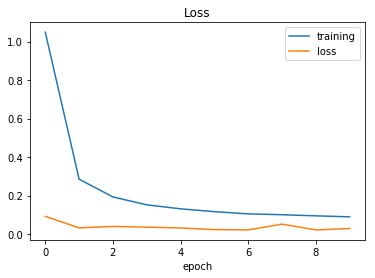

In [26]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training','loss'])
plt.title('Loss')
plt.xlabel('epoch')





Text(0.5, 0, 'epoch')

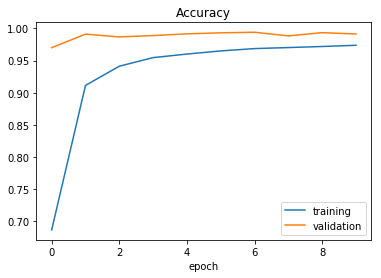

In [27]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [28]:
score = model.evaluate(X_test,y_test,verbose=0)

print('Test score : ', score[0])
print('Test accuracy : ',score[1])

Test score :  0.10164448587411899
Test accuracy :  0.97498020583075


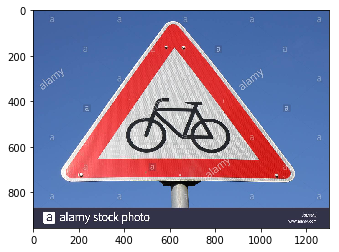

In [29]:
#fetch image

import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


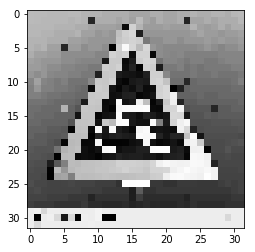

In [30]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [31]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [29]
